In [13]:
import pandas as pd
import numpy as np

In [14]:
data_wig20 = pd.read_csv("data/wig20_2005.csv")
data_ccc = pd.read_csv("data/ccc_2005.csv")

In [15]:
data_ccc

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2005-01-03,7.6302,7.6725,7.5876,7.6725,8145
1,2005-01-04,7.6725,7.6725,7.6302,7.6302,4845
2,2005-01-05,7.5876,7.5876,7.3493,7.3918,3579
3,2005-01-06,7.3918,7.4346,7.3918,7.3918,12006
4,2005-01-07,7.3918,7.5535,7.3918,7.3918,4235
...,...,...,...,...,...,...
4731,2023-12-21,65.2000,66.1800,63.3000,65.2800,214008
4732,2023-12-22,65.0000,65.7200,63.6400,63.7000,144312
4733,2023-12-27,63.6000,64.6600,62.5800,63.3000,174720
4734,2023-12-28,63.2400,63.4800,61.7000,62.0200,163245


In [16]:
data_ccc['Zwrot'] = data_ccc['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [17]:
window_length = 30

In [18]:
rolling_betas = [np.nan] * window_length 

In [19]:
for end_index in range(window_length, len(data_ccc)):
    window_data_ccc = data_ccc.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_ccc['Zwrot'].mean()

    sum_numerator = ((window_data_ccc['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [20]:
rolling_betas = rolling_betas[:len(data_ccc)]

In [21]:
data_ccc['Beta'] = rolling_betas

In [22]:
data_ccc

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Beta
0,2005-01-03,7.6302,7.6725,7.5876,7.6725,8145,NaN,NaN
1,2005-01-04,7.6725,7.6725,7.6302,7.6302,4845,-0.005513,NaN
2,2005-01-05,7.5876,7.5876,7.3493,7.3918,3579,-0.031244,NaN
3,2005-01-06,7.3918,7.4346,7.3918,7.3918,12006,0.000000,NaN
4,2005-01-07,7.3918,7.5535,7.3918,7.3918,4235,0.000000,NaN
...,...,...,...,...,...,...,...,...
4731,2023-12-21,65.2000,66.1800,63.3000,65.2800,214008,-0.009408,-0.257123
4732,2023-12-22,65.0000,65.7200,63.6400,63.7000,144312,-0.024203,-0.242694
4733,2023-12-27,63.6000,64.6600,62.5800,63.3000,174720,-0.006279,-0.186960
4734,2023-12-28,63.2400,63.4800,61.7000,62.0200,163245,-0.020221,-0.046184


In [23]:
data_ccc.to_csv("data/ccc_2005_beta.csv", index=False)

In [24]:
start_date = data_ccc.index[30]

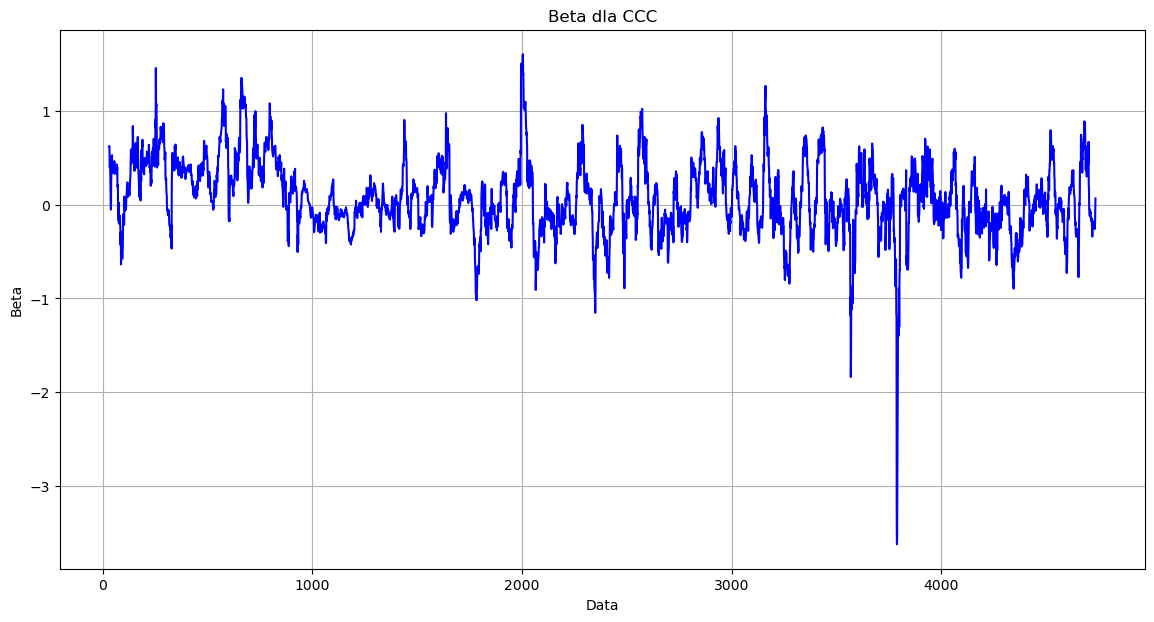

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, data_ccc.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla CCC')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

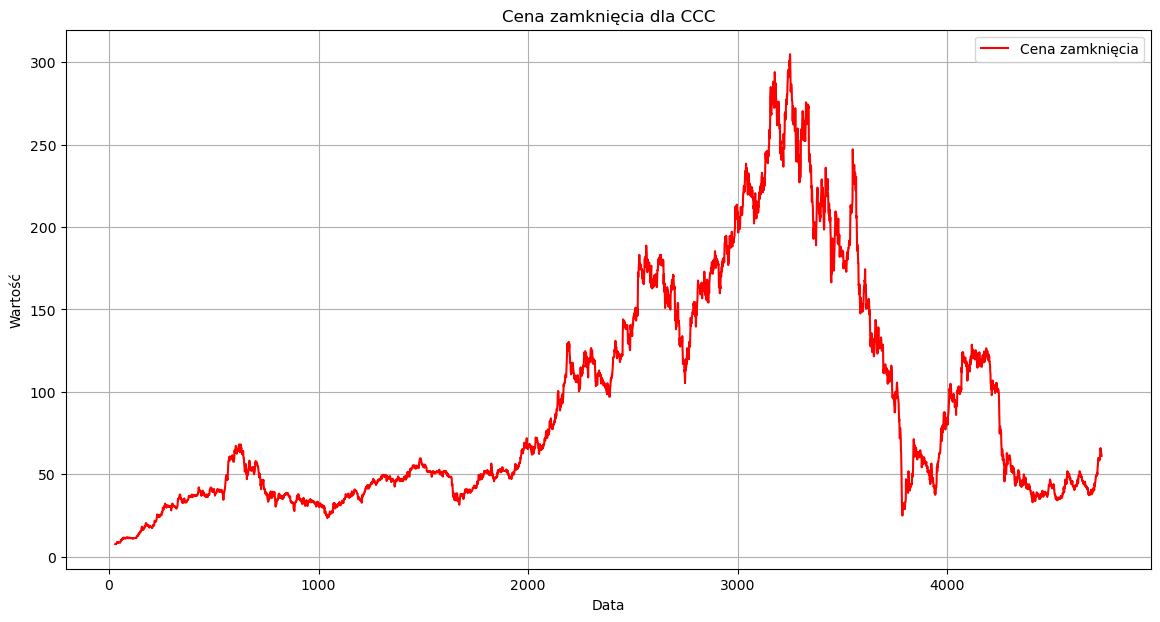

In [26]:
start_date = data_ccc.index[30]

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, data_ccc.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla CCC')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

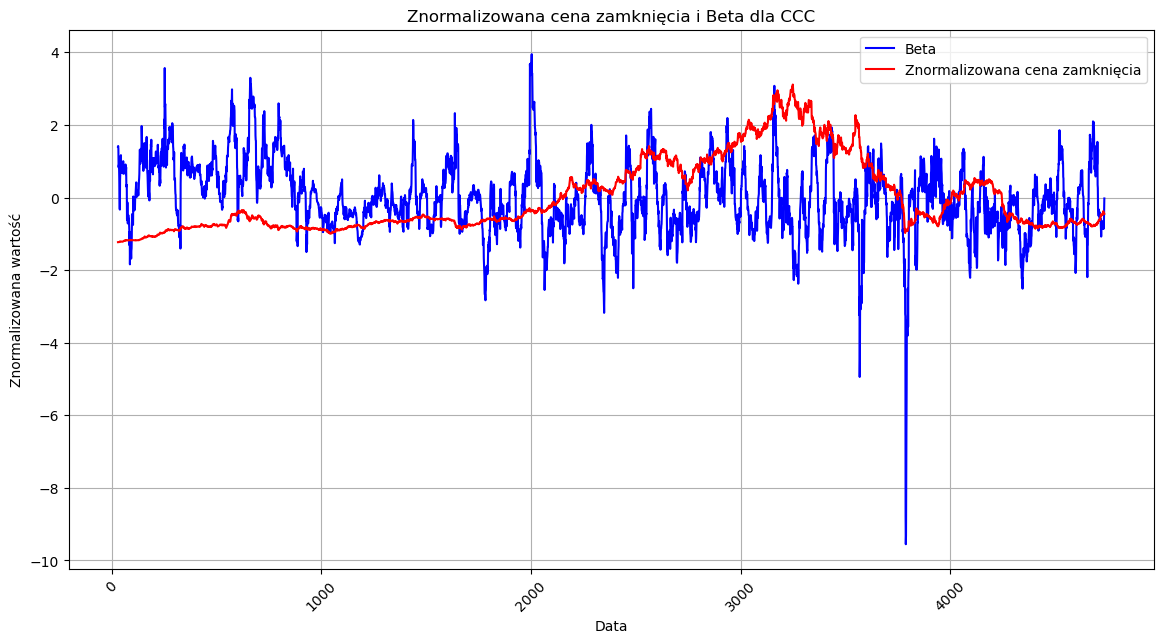

In [27]:
start_date = data_ccc.index[30]

normalized_rolling_beta = (data_ccc.loc[start_date:]['Beta'] - data_ccc.loc[start_date:]['Beta'].mean()) / data_ccc.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_ccc.loc[start_date:]['Zamkniecie'] - data_ccc.loc[start_date:]['Zamkniecie'].mean()) / data_ccc.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_ccc.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla CCC')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()